Importamos las librerias necesarias.

In [ ]:
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import keras.utils as image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definimos el modelo

In [ ]:
def VGGupdated(input_tensor=None, classes=3):    
   
    img_rows, img_cols = 224, 224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Bloque 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Bloque 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Bloque 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Bloque 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Bloque 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Bloque de Classificacion
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

   
    # Crear el modelo.
     
    model = Model(inputs = img_input, outputs = x, name='VGGdemo')


    return model


A continuacion lo compilamos

In [ ]:
model = VGGupdated(classes = 3) # Una calse por emoción 

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Lo siguiente es cargar las imagenes con las que entrenaremos el modelo

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

ruta_carpeta = '/content/drive/MyDrive/emojis_dataset'

dataset_path = os.listdir(ruta_carpeta)

tipos_emoji = os.listdir(ruta_carpeta)

print (tipos_emoji)  #Que emojis componen el dataset

print("Tipos de emoji encontrados: ", len(dataset_path))

['3_Enojo', '1_Felicidad', '2_Tristeza']
Tipos de emoji encontrados:  3


In [ ]:
emojis = []

for item in tipos_emoji:
 # Obtiene los nombres de tdos los archivos
 lista_imagenes = os.listdir(ruta_carpeta + '/' +item)

 # Se añaden a la lista
 for archivo in lista_imagenes:
    emojis.append((item, str(ruta_carpeta + '/' +item) + '/' + archivo))
    #print(emojis)

In [ ]:
# Contruir un dataframe        
emojis_df = pd.DataFrame(data=emojis, columns=['Emoji', 'Imagen'])
print(emojis_df.head())

     Emoji                                             Imagen
0  3_Enojo  /content/drive/MyDrive/emojis_dataset/3_Enojo/...
1  3_Enojo  /content/drive/MyDrive/emojis_dataset/3_Enojo/...
2  3_Enojo  /content/drive/MyDrive/emojis_dataset/3_Enojo/...
3  3_Enojo  /content/drive/MyDrive/emojis_dataset/3_Enojo/...
4  3_Enojo  /content/drive/MyDrive/emojis_dataset/3_Enojo/...


In [ ]:
# Aqui podemos revisar cuántas imágenes hay por cada categoría 
print("Total de emojis en el dataset: ", len(emojis_df))

contador_imgs = emojis_df['Emoji'].value_counts()

print("Imagenes en cada categoria: ")
print(contador_imgs)

Total de emojis en el dataset:  308
Imagenes en cada categoria: 
1_Felicidad    126
2_Tristeza     126
3_Enojo         56
Name: Emoji, dtype: int64


In [ ]:
import cv2
path = ruta_carpeta + '/'


tamanio_img = 224

imagenes = []
labels = []

for i in tipos_emoji:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (tamanio_img, tamanio_img))
        imagenes.append(img)
        labels.append(i)

In [ ]:
imagenes = np.array(imagenes)

imagenes = imagenes.astype('float32') / 255.0
imagenes.shape 

(308, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

y=emojis_df['Emoji'].values

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.compose import ColumnTransformer
y=y.reshape(-1,1)

columnTransformer = ColumnTransformer([('emoji', OneHotEncoder(), [0])], remainder='passthrough')
Y=np.array(columnTransformer.fit_transform(y))
Y.shape  #(308, 3)

(308, 3)

El siguiente paso es el entrenamiento del modelo

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


imagenes, Y = shuffle(imagenes, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(imagenes, Y, test_size=0.8, random_state=650)

#Inspeccionamos las formas de las entradas de entrenamiento y evaluación.
print(train_x.shape)
print(test_x.shape)

(61, 224, 224, 3)
(61, 3)
(247, 224, 224, 3)
(247, 3)


In [ ]:
model.fit(train_x, train_y, epochs = 10, batch_size = 32)  

Epoch 1/10
2/2 [==============================] - 41s 11s/step - loss: 2.6079 - accuracy: 0.2623
Epoch 2/10
2/2 [==============================] - 1s 372ms/step - loss: 1.0837 - accuracy: 0.4262
Epoch 3/10
2/2 [==============================] - 1s 368ms/step - loss: 1.1205 - accuracy: 0.4262
Epoch 4/10
2/2 [==============================] - 1s 367ms/step - loss: 1.0591 - accuracy: 0.4262
Epoch 5/10
2/2 [==============================] - 1s 377ms/step - loss: 1.0520 - accuracy: 0.4098
Epoch 6/10
2/2 [==============================] - 1s 377ms/step - loss: 1.0353 - accuracy: 0.4098
Epoch 7/10
2/2 [==============================] - 1s 374ms/step - loss: 1.0346 - accuracy: 0.4098
Epoch 8/10
2/2 [==============================] - 1s 373ms/step - loss: 1.0381 - accuracy: 0.4098
Epoch 9/10
2/2 [==============================] - 1s 364ms/step - loss: 1.0314 - accuracy: 0.4262
Epoch 10/10
2/2 [==============================] - 1s 362ms/step - loss: 1.0308 - accuracy: 0.4262


In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Errores = " + str(preds[0]))
print ("Aciertos = " + str(preds[1]))

8/8 [==============================] - 4s 527ms/step - loss: 1.0478 - accuracy: 0.4049
Errores = 1.0477937459945679
Aciertos = 0.4048582911491394


Al finalizar, lo que queda es probar utilizando una imagen dada por el usuario

Input image shape: (1, 224, 224, 3)


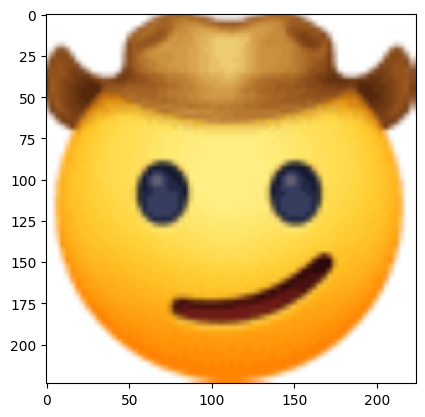

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow

img_path = '/content/drive/MyDrive/emojis_validar/sombrero_feliz.png'

load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

Aqui podemos ver el resultado

In [ ]:
resultado = model.predict(x)

print(tipos_emoji[1] + ": \t" + str(format(resultado[0][1],".2f")) + "%")
print(tipos_emoji[2] + ": \t" + str(format(resultado[0][2],".2f")) + "%")
print(tipos_emoji[0] + ": \t" + str(format(resultado[0][0],".2f")) + "%")

1/1 [==============================] - 1s 864ms/step
1_Felicidad: 	0.98%
2_Tristeza: 	0.00%
3_Enojo: 	0.02%
